# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [206]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [207]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [208]:
#  1. Get the total rides for each city type
ride_count_by_type = pyber_data_df.groupby(['type']).count()['ride_id']
ride_count_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [209]:
# 2. Get the total drivers for each city type
driver_count_by_type = city_data_df.groupby(['type']).sum()['driver_count']
driver_count_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [210]:
#  3. Get the total amount of fares for each city type
total_fares_by_type = pyber_data_df.set_index(['type']).groupby(['type']).sum()['fare']
total_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [211]:
#  4. Get the average fare per ride for each city type. 
average_fares_per_ride_by_type = pyber_data_df.set_index(['type']).groupby(['type']).sum()['fare'] / pyber_data_df.set_index(['type']).groupby(['type']).count()['fare']
average_fares_per_ride_by_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [212]:
# 5. Get the average fare per driver for each city type. 
average_fares_per_driver_by_type = pyber_data_df.set_index(['type']).groupby(['type']).sum()['fare'] / city_data_df.set_index(['type']).groupby(['type']).sum()['driver_count']
average_fares_per_driver_by_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [213]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
          {"Total Rides": ride_count_by_type,
          "Total Drivers": driver_count_by_type,
          "Total Fares": total_fares_by_type,
          "Average Fare per Ride": average_fares_per_ride_by_type,
          "Average Fare per Driver": average_fares_per_driver_by_type
          })
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [214]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [215]:
#  8. Format the columns.
pyber_summary_df = pd.DataFrame(
          {"Total Rides": ride_count_by_type.map("{:,}".format),
          "Total Drivers": driver_count_by_type.map("{:,}".format),
          "Total Fares": total_fares_by_type.map("${:,.2f}".format),
          "Average Fare per Ride": average_fares_per_ride_by_type.map("${:,.2f}".format),
          "Average Fare per Driver": average_fares_per_driver_by_type.map("${:,.2f}".format)})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [216]:
# 1. Read the merged DataFrame
pyber_data_df.rename(columns={'city': 'City',
                     'date':'Date',
                     'fare':'Fare', 
                     'ride_id': 'Ride Id',
                     'driver_count': 'No. Drivers', 
                     'type':'City Type'}, inplace=True)
pyber_data_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [217]:
# Set index to date
pyber_data_df.set_index("Date", inplace = True)
pyber_data_df.head()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban


In [218]:
## Create new DF for fare data, include Date, City Type, Fare
pyber_data_fares_df = pyber_data_df[["Fare", "City Type"]].copy() 
pyber_data_fares_df.head()

,Fare,City Type
Date,,
2019-01-14 10:14:22,13.83,Urban
2019-03-04 18:24:09,30.24,Urban
2019-02-24 04:29:00,33.44,Urban
2019-02-10 23:22:03,23.44,Urban
2019-03-06 04:28:35,34.58,Urban


In [219]:
# Set the index to date time data type. 
pyber_data_fares_df.index = pd.to_datetime(pyber_data_fares_df.index)

In [220]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares for each date where the indices are the city type and date.
sum_fares_by_type = pyber_data_fares_df.groupby(["City Type"]).sum()["Fare"]
sum_fares_by_type

City Type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: Fare, dtype: float64

In [221]:
# 2b. Dataframe for sum of fares by date
sum_fares_by_date = pyber_data_fares_df.groupby(["Date"]).sum()["Fare"]
sum_fares_by_date.head()

Date
2019-01-01 00:08:16    37.91
2019-01-01 00:46:46    47.74
2019-01-01 02:07:24    24.07
2019-01-01 03:46:50     7.57
2019-01-01 05:23:21    10.75
Name: Fare, dtype: float64

In [222]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
pyber_data_fares_df = pyber_data_fares_df.reset_index()

In [223]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' to get the total fares for each type of city by the date. 
pyber_pivot = pd.pivot_table(pyber_data_fares_df, 
                   values="Fare", 
                   index="Date",
                   columns="City Type")

In [224]:
# Create a Dataframe from pivot data frame. 
pyber_data_fares_df_sub= pd.pivot_table(pyber_data_fares_df, 
                    values="Fare", 
                    index="Date",
                    columns="City Type")
pyber_data_fares_df_sub.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [225]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pyber_pivot_df = pyber_data_fares_df_sub.loc['2019-01-01':'2019-04-29']

In [226]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
pyber_pivot_df.index = pd.to_datetime(pyber_pivot_df.index)
pyber_pivot_df.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [227]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2218 entries, 2019-01-01 00:08:16 to 2019-04-29 23:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  579 non-null    float64
 2   Urban     1523 non-null   float64
dtypes: float64(3)
memory usage: 69.3 KB


In [228]:
pyber_data_fares_df = pyber_data_df[["Fare", "City Type"]].copy() 
pyber_data_fares_df.head()

,Fare,City Type
Date,,
2019-01-14 10:14:22,13.83,Urban
2019-03-04 18:24:09,30.24,Urban
2019-02-24 04:29:00,33.44,Urban
2019-02-10 23:22:03,23.44,Urban
2019-03-06 04:28:35,34.58,Urban


In [229]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_summary = pyber_pivot_df.resample('W').sum()
weekly_summary.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


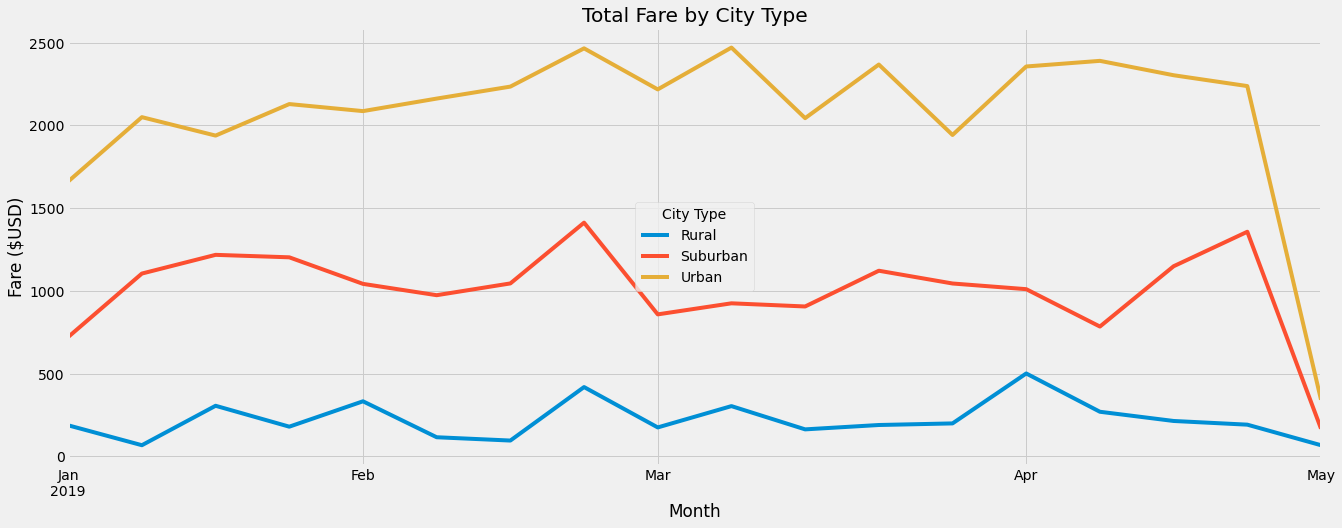

In [230]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Create a plot
ax = weekly_summary.plot(figsize=(20, 7.5))
                                
# Create titles, axis labels, and legend
ax.set_title("Total Fare by City Type")
ax.set_ylabel("Fare ($USD)")
ax.set_xlabel("Month")

# Save plot to analysis folder
plt.savefig("Analysis/Pyber_Challenge.png")

plt.show()
